# Explanatory Data Analysis of Youtube and Spotify songs
### Analysis of most popular artists, songs and undertanding the factors reponsible for more views and likes

In [2]:
# import necessary libraries
import numpy as np # for numerical analysis
import pandas as pd # for data wrangling
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

import warnings
warnings.filterwarnings("ignore") # supress warning messages

In [3]:
pd.options.display.float_format = "{:2f}".format #limit all decimal numbers to 2 decimal places

In [4]:
#load the csv data
data = pd.read_csv("D:/data sets/Spotify youtube/Spotify_Youtube.csv")
data1 = data #making a duplicate of the data

data1.head(3) #showing the first 3 rows of the data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818000,0.705000,6.000000,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.000000,6220896.000000,169907.000000,Official HD Video for Gorillaz' fantastic trac...,True,True,1040234854.000000
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676000,0.703000,8.000000,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.000000,1079128.000000,31003.000000,The official video for Gorillaz - Rhinestone E...,True,True,310083733.000000
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695000,0.923000,1.000000,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.000000,282142.000000,7399.000000,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.000000


In [5]:
#deleting the unncecssary columns
data1.drop(["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube", "Title", "Description","Channel" ], axis=1, inplace = True)

data1.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818000,0.705000,6.000000,-6.679000,0.177000,0.008360,...,0.613000,0.772000,138.559000,222640.000000,693555221.000000,6220896.000000,169907.000000,True,True,1040234854.000000
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676000,0.703000,8.000000,-5.815000,0.030200,0.086900,...,0.046300,0.852000,92.761000,200173.000000,72011645.000000,1079128.000000,31003.000000,True,True,310083733.000000
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695000,0.923000,1.000000,-3.930000,0.052200,0.042500,...,0.116000,0.551000,108.014000,215150.000000,8435055.000000,282142.000000,7399.000000,True,True,63063467.000000
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689000,0.739000,2.000000,-5.810000,0.026000,0.000015,...,0.064000,0.578000,120.423000,233867.000000,211754952.000000,1788577.000000,55229.000000,True,True,434663559.000000
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663000,0.694000,10.000000,-8.627000,0.171000,0.025300,...,0.069800,0.525000,167.953000,340920.000000,618480958.000000,6197318.000000,155930.000000,True,True,617259738.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Views             20248 non-null  float64
 16  Likes             20177 non-null  float6

In [7]:
#checking for duplicates
len(data1)-len(data1.drop_duplicates())

0

In [8]:
#checking for null values
data1.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

In [9]:
# imputing the null values with median for continuous variable and mode for categorical variable
data1.Views = data1.Views.fillna(data1.Views.median())
data1.Likes = data1.Likes.fillna(data1.Likes.median())
data1.Comments = data1.Comments.fillna(data1.Comments.median())
data1.Stream = data1.Stream.fillna(data1.Stream.median())
data1.Licensed = data1.Licensed.fillna(data1.Licensed.mode()[0])
data1.official_video = data1.official_video.fillna(data1.official_video.mode()[0])

In [10]:
data1 = data1.dropna()

In [11]:
data1.isnull().sum() #checking data after null value treatment

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [12]:
#checking the descriptive statistics of the data
data1.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,224717.579021,92142902.117445,649318.744642,26855.269357,133544565.276887
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,124790.542610,271780735.598635,1767974.818628,190612.850328,241143294.537065
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,30985.000000,0.000000,0.000000,0.000000,6574.000000
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,180009.500000,1948664.000000,23018.250000,542.000000,18253550.750000
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,213284.500000,14501095.000000,124481.000000,3277.000000,49682981.500000
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,252443.000000,67500367.750000,499732.250000,13730.250000,133777303.250000
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4676058.000000,8079649362.000000,50788652.000000,16083138.000000,3386520288.000000


In [13]:
#checking unique values in each row
data1.nunique()

Artist               2079
Track               17839
Album               11931
Album_type              3
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Views               19244
Likes               17938
Comments            10484
Licensed                2
official_video          2
Stream              18460
dtype: int64

Views          AxesSubplot(0.125,0.11;0.168478x0.77)
Likes       AxesSubplot(0.327174,0.11;0.168478x0.77)
Comments    AxesSubplot(0.529348,0.11;0.168478x0.77)
Stream      AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

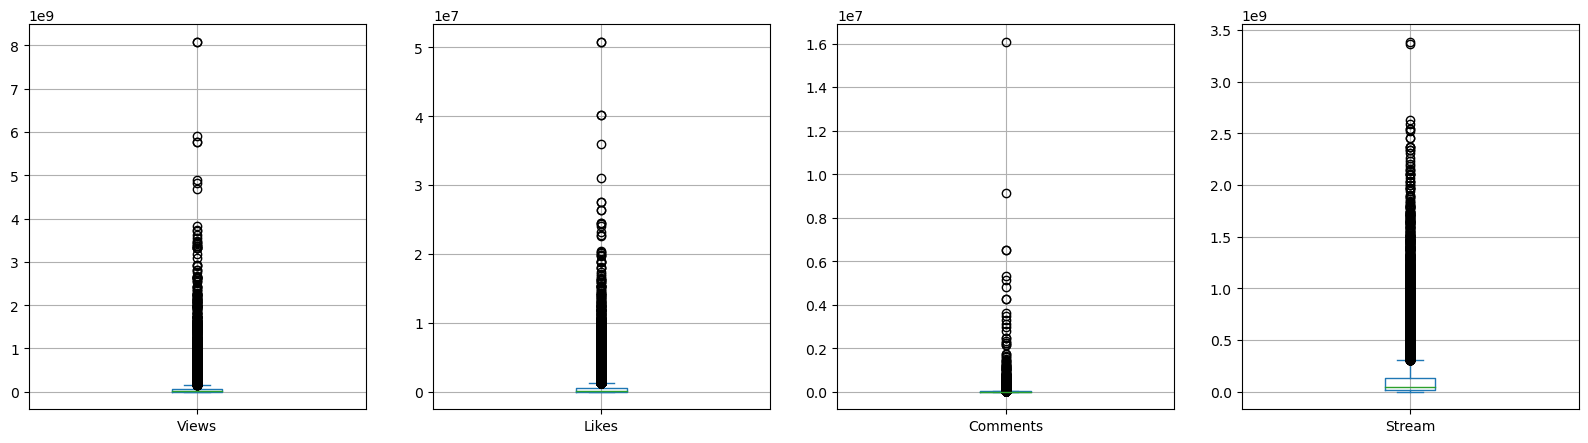

In [14]:
# checking for outliers using box plot....

data1[["Views", "Likes", "Comments", "Stream"]].plot(kind = "box", subplots = True, figsize = (20,5), grid = True)

### so all these columns has outliers, so we will treat them one by one

<AxesSubplot:>

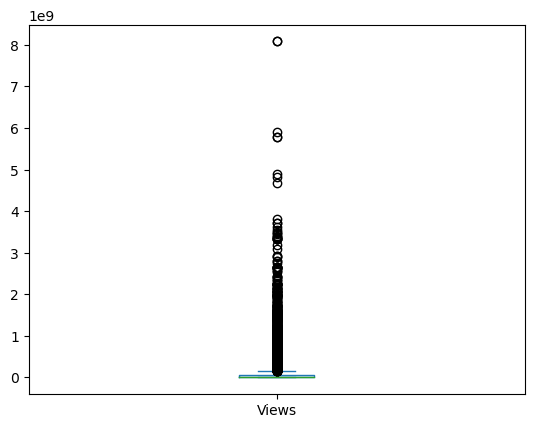

In [15]:
data1.Views.plot(kind = "box")

In [16]:
data1[data1['Views']>5000000000] = 4898831101
data1[data1['Likes']>30000000] = 27588224
data1[data1['Comments']>6000000] = 5331537
data1[data1['Stream']>3000000000] = 2634013335



In [17]:
data1.Comments.sort_values(ascending = False).head(20)

15250   2634013335.000000
14580      5331537.000000
14565      5331537.000000
8937       5331537.000000
16030      5331537.000000
14566      5331537.000000
12452      5331537.000000
365        5331537.000000
1147       5331537.000000
14561      5331537.000000
12469      5331537.000000
17999      5130725.000000
14076      4805805.000000
17996      3637659.000000
14567      3486944.000000
18004      3312226.000000
12080      3109122.000000
14563      2984558.000000
19162      2782480.000000
14574      2469841.000000
Name: Comments, dtype: float64

In [18]:
data1[data1['Views']>5000000000] = 4898831101
data1[data1['Likes']>30000000] = 27588224
data1[data1['Comments']>6000000] = 5331537
data1[data1['Stream']>3000000000] = 2634013335

### box plot after treating the outliers

Views          AxesSubplot(0.125,0.11;0.168478x0.77)
Likes       AxesSubplot(0.327174,0.11;0.168478x0.77)
Comments    AxesSubplot(0.529348,0.11;0.168478x0.77)
Stream      AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

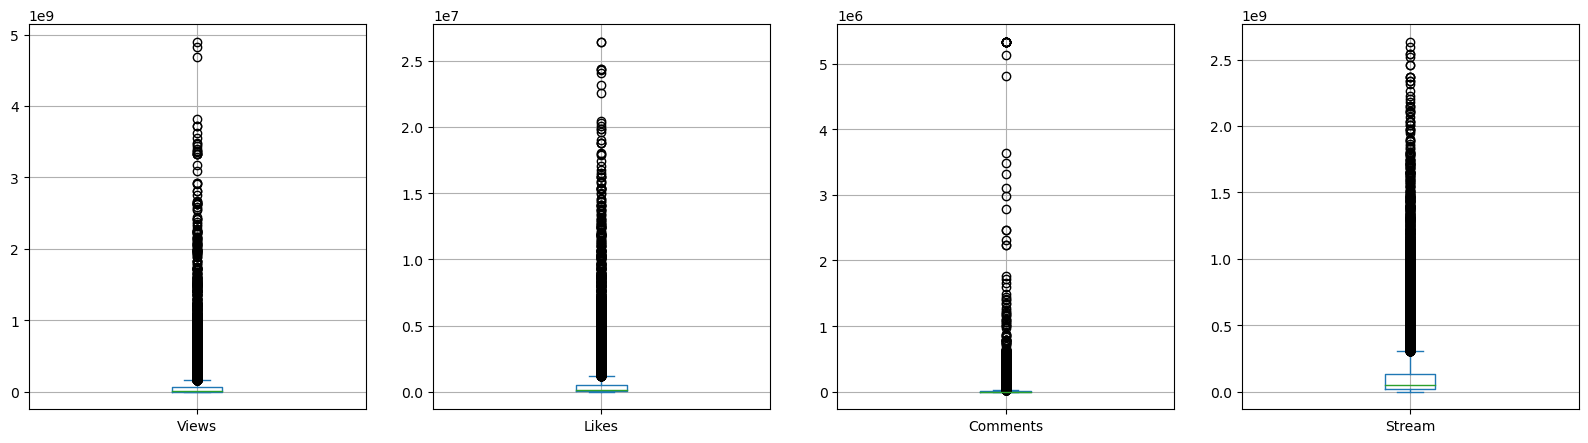

In [19]:
data1[["Views", "Likes", "Comments", "Stream"]].plot(kind = "box", subplots = True, figsize = (20,5), grid = True)

In [20]:
# now the data is cleaned for analysis
# we will store the data into a new variable df

df = data1

In [21]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818000,0.705000,6.000000,-6.679000,0.177000,0.008360,...,0.613000,0.772000,138.559000,222640.000000,693555221.000000,6220896.000000,169907.000000,True,True,1040234854.000000
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676000,0.703000,8.000000,-5.815000,0.030200,0.086900,...,0.046300,0.852000,92.761000,200173.000000,72011645.000000,1079128.000000,31003.000000,True,True,310083733.000000
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695000,0.923000,1.000000,-3.930000,0.052200,0.042500,...,0.116000,0.551000,108.014000,215150.000000,8435055.000000,282142.000000,7399.000000,True,True,63063467.000000
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689000,0.739000,2.000000,-5.810000,0.026000,0.000015,...,0.064000,0.578000,120.423000,233867.000000,211754952.000000,1788577.000000,55229.000000,True,True,434663559.000000
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663000,0.694000,10.000000,-8.627000,0.171000,0.025300,...,0.069800,0.525000,167.953000,340920.000000,618480958.000000,6197318.000000,155930.000000,True,True,617259738.000000


# univariate analysis

In [26]:
df.groupby(["Album_type"]).size()

Album_type
5331537           10
album          14916
compilation      788
single          5002
dtype: int64

In [28]:
df[df['Album_type'] == 5331537]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
365,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
1147,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
12452,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
12469,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
14561,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
14565,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
14566,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
14580,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
15250,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000
16030,5331537,5331537,5331537,5331537,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,...,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537.000000,5331537,5331537,5331537.000000


In [29]:
df.drop(df.index[df['Album_type'] == 5331537], inplace=True)

<AxesSubplot:xlabel='Album_type'>

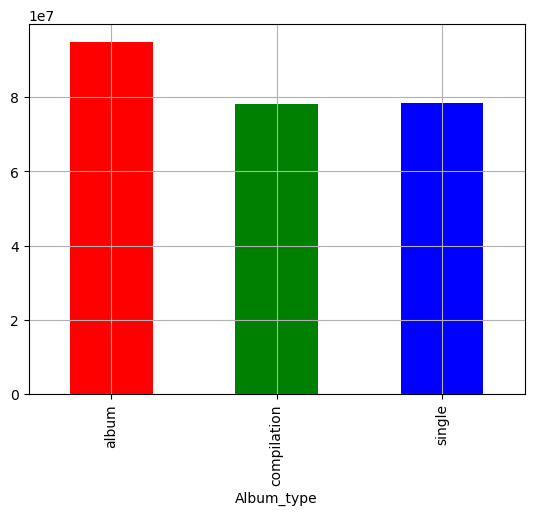

In [39]:
#average Views by album type

df.groupby(["Album_type"]).Views.mean().plot(kind = "bar", grid = True, color = ['red','green','blue'])

In [65]:
df.groupby(["Artist"]).Views.mean().sort_values(ascending = False).head(10)

Artist
CoComelon                 1460167121.100000
Katy Perry                1312063207.500000
Justin Bieber             1099106023.600000
Ed Sheeran                1061312143.333333
Bruno Mars                1024091922.700000
Macklemore & Ryan Lewis   1012205556.000000
Coldplay                   999727788.400000
Calvin Harris              975847613.900000
BLACKPINK                  939296198.900000
DJ Snake                   918026835.500000
Name: Views, dtype: float64

Text(0.5, 0, 'Views in billion')

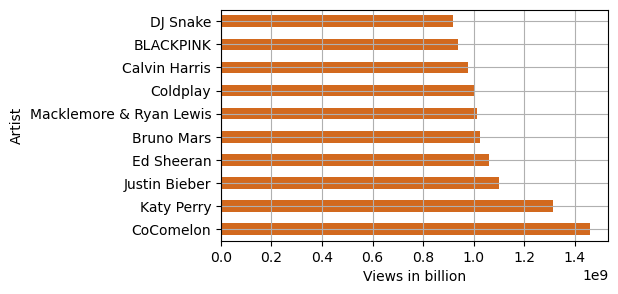

In [81]:
# Top 10 viewed artist and their average views in billion

df.groupby(["Artist"]).Views.mean().sort_values(ascending = False).head(10).plot(kind = "barh", grid = True, color = ("chocolate"),figsize=(5,3))
plt.xlabel("Views in billion")

Text(0.5, 0, 'Views in billion')

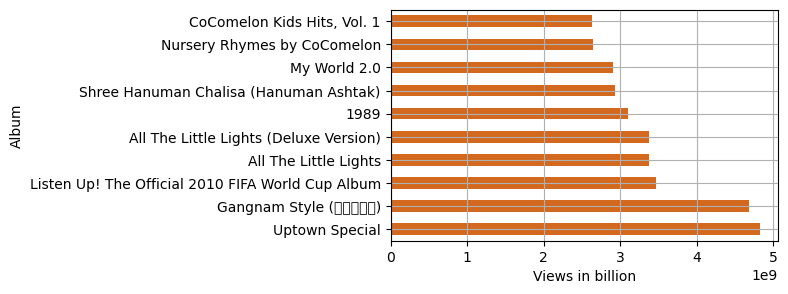

In [82]:
# top 10 album and their average views in billion

df.groupby(["Album"]).Views.mean().sort_values(ascending = False).head(10).plot(kind = "barh", grid = True, color = ("chocolate"),figsize=(5,3))
plt.xlabel("Views in billion")

Text(0.5, 0, 'Likes in billion')

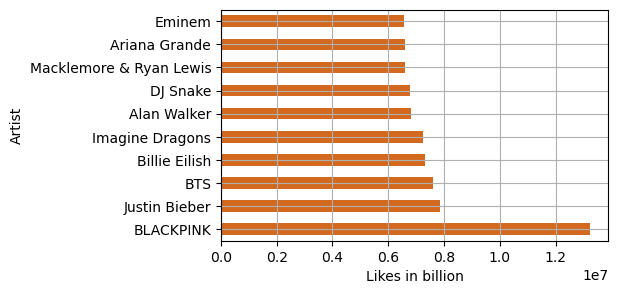

In [83]:
# most liked artist

df.groupby(["Artist"]).Likes.mean().sort_values(ascending = False).head(10).plot(kind = "barh", grid = True, color = ("chocolate"),figsize=(5,3))
plt.xlabel("Likes in billion")

Text(0.5, 0, 'Likes in billion')

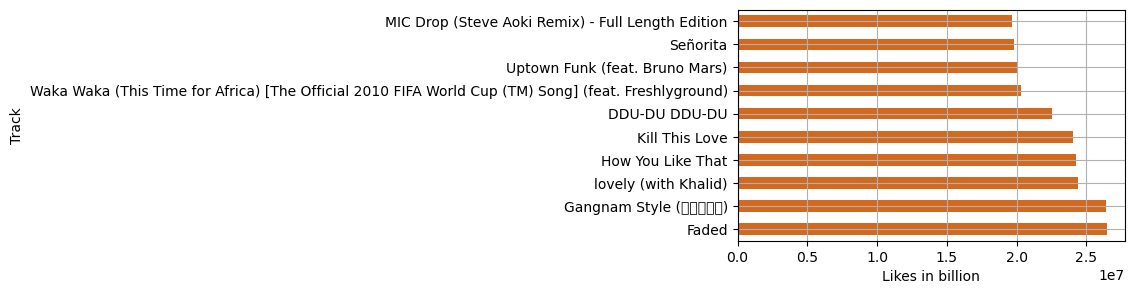

In [84]:
# most liked track

df.groupby(["Track"]).Likes.mean().sort_values(ascending = False).head(10).plot(kind = "barh", grid = True, color = ("chocolate"),figsize=(5,3))
plt.xlabel("Likes in billion")


In [76]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818000,0.705000,6.000000,-6.679000,0.177000,0.008360,...,0.613000,0.772000,138.559000,222640.000000,693555221.000000,6220896.000000,169907.000000,True,True,1040234854.000000
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676000,0.703000,8.000000,-5.815000,0.030200,0.086900,...,0.046300,0.852000,92.761000,200173.000000,72011645.000000,1079128.000000,31003.000000,True,True,310083733.000000
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695000,0.923000,1.000000,-3.930000,0.052200,0.042500,...,0.116000,0.551000,108.014000,215150.000000,8435055.000000,282142.000000,7399.000000,True,True,63063467.000000
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689000,0.739000,2.000000,-5.810000,0.026000,0.000015,...,0.064000,0.578000,120.423000,233867.000000,211754952.000000,1788577.000000,55229.000000,True,True,434663559.000000
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663000,0.694000,10.000000,-8.627000,0.171000,0.025300,...,0.069800,0.525000,167.953000,340920.000000,618480958.000000,6197318.000000,155930.000000,True,True,617259738.000000


## bivariate analysis
### we will analyse which component of the song is responsibe for most views

In [85]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [98]:
cont = df[['Views','Likes', 'Stream','Energy','Loudness', 'Speechiness', 'Instrumentalness', 'Acousticness','Liveness','Valence','Tempo','Duration_ms','Danceability']]

In [99]:
cont.head()

,Views,Likes,Stream,Energy,Loudness,Speechiness,Instrumentalness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Danceability
0,693555221.000000,6220896.000000,1040234854.000000,0.705000,-6.679000,0.177000,0.002330,0.008360,0.613000,0.772000,138.559000,222640.000000,0.818000
1,72011645.000000,1079128.000000,310083733.000000,0.703000,-5.815000,0.030200,0.000687,0.086900,0.046300,0.852000,92.761000,200173.000000,0.676000
2,8435055.000000,282142.000000,63063467.000000,0.923000,-3.930000,0.052200,0.046900,0.042500,0.116000,0.551000,108.014000,215150.000000,0.695000
3,211754952.000000,1788577.000000,434663559.000000,0.739000,-5.810000,0.026000,0.509000,0.000015,0.064000,0.578000,120.423000,233867.000000,0.689000
4,618480958.000000,6197318.000000,617259738.000000,0.694000,-8.627000,0.171000,0.000000,0.025300,0.069800,0.525000,167.953000,340920.000000,0.663000


In [100]:
cont.corr()

,Views,Likes,Stream,Energy,Loudness,Speechiness,Instrumentalness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Danceability
Views,1.000000,0.883842,0.605590,0.070444,0.124190,-0.016069,-0.081873,-0.078755,-0.015183,0.032928,-0.002429,0.023669,0.092489
Likes,0.883842,1.000000,0.667760,0.065979,0.131991,0.006410,-0.083069,-0.086516,-0.022350,0.006048,0.002028,0.006806,0.105622
Stream,0.605590,0.667760,1.000000,0.043221,0.118764,-0.018953,-0.091562,-0.103505,-0.038590,-0.014004,0.001647,-0.011125,0.073617
Energy,0.070444,0.065979,0.043221,1.000000,0.744890,0.065300,-0.310072,-0.658359,0.173765,0.389063,0.157186,0.022650,0.236668
Loudness,0.124190,0.131991,0.118764,0.744890,1.000000,0.033691,-0.545390,-0.547705,0.087202,0.311447,0.144746,0.012079,0.353351
Speechiness,-0.016069,0.006410,-0.018953,0.065300,0.033691,1.000000,-0.109898,-0.077605,0.085486,0.059158,0.037476,-0.051253,0.210393
Instrumentalness,-0.081873,-0.083069,-0.091562,-0.310072,-0.545390,-0.109898,1.000000,0.274371,-0.060105,-0.269799,-0.076745,-0.007292,-0.318593
Acousticness,-0.078755,-0.086516,-0.103505,-0.658359,-0.547705,-0.077605,0.274371,1.000000,-0.040997,-0.200807,-0.129239,-0.028881,-0.279505
Liveness,-0.015183,-0.022350,-0.038590,0.173765,0.087202,0.085486,-0.060105,-0.040997,1.000000,0.032004,0.006721,-0.004990,-0.084385
Valence,0.032928,0.006048,-0.014004,0.389063,0.311447,0.059158,-0.269799,-0.200807,0.032004,1.000000,0.090277,-0.052341,0.465752


<Figure size 2000x800 with 0 Axes>

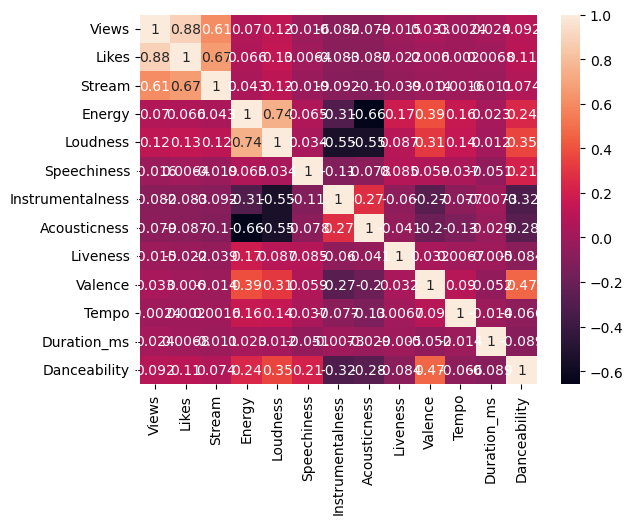

<Figure size 2000x800 with 0 Axes>

In [103]:
sns.heatmap(cont.corr(), annot = True)
plt.figure(figsize=(20, 8))

### hence there is no relation between any component of the song , with its views.